In [23]:
import os
import math
import numpy as np
import torch
import train_vit as train_vit
import train_spectra as train_spectra
import matplotlib.pyplot as plt
import test as te
import data.prepare_sers_data as psd 
import imp
import utils
import vis_utils as vu
import models.spectra_model as spectra_model
import configs.common as common

def get_freer_gpu():
    os.system('nvidia-smi -q -d Memory |grep -A4 GPU|grep Free >tmp')
    memory_available = [int(x.split()[2]) for x in open('tmp', 'r').readlines()]
    return np.argsort(memory_available)

num_gpu = 1
free_id = get_freer_gpu()
use_id = free_id[-num_gpu:]
use_id_list = ",".join(["%d" % i for i in use_id])
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = use_id_list

In [723]:
import tomas_produce_figure as tpf
import pickle
imp.reload(tpf)
# tpf.aggregate_performance("PA", detection=False, quantification=True, 
#                           target_size=40, 
#                           learning_rate=0.0006, normalization="none",
#                           loss="mse", model_init="xavier", 
#                          lr_schedule="cosine", 
#                          version_group=[], 
#                           loc="scratch"
#                          )

tpf.aggregate_performance("DNP", detection=False, quantification=True, 
                          target_size=44, 
                          learning_rate=0.006, normalization="none",
                          loss="mse", model_init="xavier", 
                         lr_schedule="cosine", 
                         version_group=[], 
                          loc="scratch"
                         )


# tpf.aggregate_performance("TOMAS", detection=False, quantification=True, 
#                           target_size=56, 
#                           learning_rate=0.08, normalization="none",
#                           loss="mse", model_init="xavier", 
#                          lr_schedule="cosine", 
#                          version_group=[21201, 16621, 7770, 12596, 9907, 23128, 
#                                         6338, 12885, 5353, 29897, 27089, 18999,  5297, 8543, 12451, 1746], 
#                           loc="scratch"
#                          )

# tpf.aggregate_performance("DNP", detection=False, quantification=True, 
#                           target_size=44, 
#                           learning_rate=0.006, normalization="none",
#                           loss="mse", model_init="xavier", 
#                          lr_schedule="cosine", 
#                          version_group=[12266, 13579, 29055, 9860, 19800], 
#                           loc="scratch"
#                          )




# tpf.aggregate_performance("TOMAS", detection=True, quantification=False, 
#                           target_size=56, loss="none", 
#                           learning_rate=0.008, normalization="none",
#                           model_init="xavier", 
#                          lr_schedule="cosine")

['stat_patch_2_lr_0.0060_cosine_initialisation_xavier_normalization_none_mse_target_h_44_leave_one_chip_v13579.obj', 'stat_patch_2_lr_0.0060_cosine_initialisation_xavier_normalization_none_mse_target_h_44_leave_one_chip_v9860.obj', 'stat_patch_2_lr_0.0060_cosine_initialisation_xavier_normalization_none_mse_target_h_44_leave_one_chip_v19800.obj', 'stat_patch_2_lr_0.0060_cosine_initialisation_xavier_normalization_none_mse_target_h_44_leave_one_chip_v12266.obj', 'stat_patch_2_lr_0.0060_cosine_initialisation_xavier_normalization_none_mse_target_h_44_leave_one_chip_v29055.obj']
../exp_data/VIT/DNP/detection_False_quantification_True_nozero/stat_patch_2_lr_0.0060_cosine_initialisation_xavier_normalization_none_mse_target_h_44_without_zero_concentration_leave_one_chip.obj


In [225]:
# path = "/nobackup/blia/exp_data/Spectra_resnet/TOMAS/detection_False_quantification_True_average_spectra_True/"
# sub_folder = [v for v in os.listdir(path) if "version_" in v]
# for s_folder in sub_folder:
#     if int(s_folder.split("version_")[1].split("_")[0]) in [20, 21, 22, 23, 24, 5, 6, 7, 8, 9]:
# #         print(s_folder)
#         pass
#     else:
# #         print(s_folder)
#         shutil.rmtree(path + s_folder)
#         pass 

(array([  7.,   9.,  54., 162., 232., 229., 186.,  82.,  33.,   6.]),
 array([0.09966401, 0.09972891, 0.09979382, 0.09985873, 0.09992363,
        0.09998854, 0.10005345, 0.10011835, 0.10018326, 0.10024816,
        0.10031307]),
 <BarContainer object of 10 artists>)

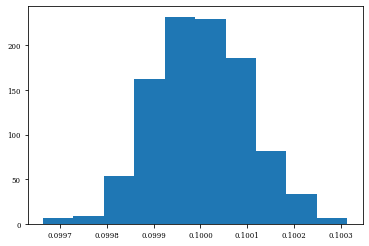

In [742]:
plt.hist(np.random.normal(0.1, 0.0001, size=1000))


In [716]:
imp.reload(mm)
mm.get_quantification_heatmap_for_ml()

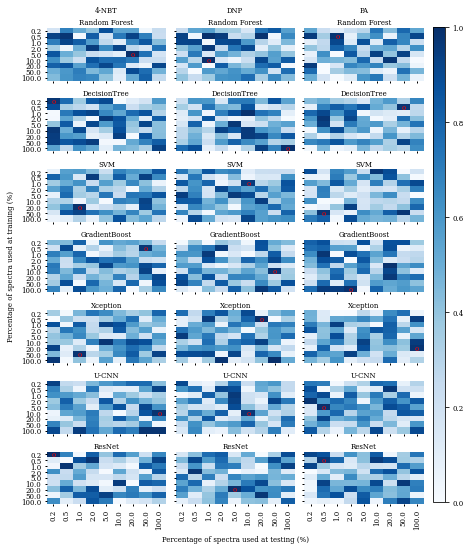

In [753]:
imp.reload(mm)
imp.reload(pfm)
pfm.combine_heatmap_multiple_data()
# pfm.combined_detection_prediction_curve_with_ml()
# pfm.combined_concentration_prediction_curve_with_ml()

0.9
[1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


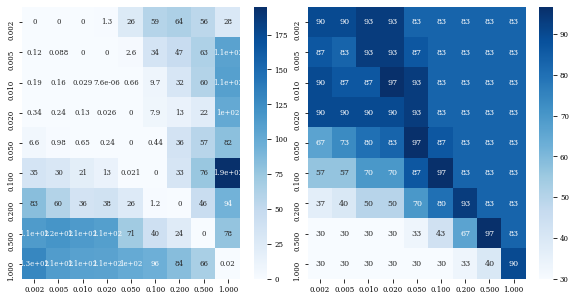

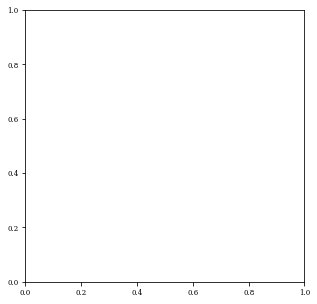

In [629]:
import tomas_produce_figure as tpf
import vis_utils as vu
imp.reload(vu)
imp.reload(tpf)

# tpf_obj = tpf.GetSpectraPerformanceTOMAS("unified_cnn", False, True, [100, 101, 102, 103, 104], True, "validation_loss",
#                                          "none", "DNP", loc="home", without_zero=True)
tpf_obj = tpf.GetSpectraPerformanceTOMAS("unified_cnn", True, False, [5, 6, 7, 8, 9], True, "validation_loss",
                                         "none", "DNP", loc="home")

if tpf_obj.dataset == "DNP":
    x_label_conc = ["Blank", "1nM", "10nM", "100nM", "1"+r'$\mu$'+"M", "10"+r'$\mu$'+"M"]
elif tpf_obj.dataset == "TOMAS":
    x_label_conc = ["Blank", "0.1nM", "1nM", "10nM", "100nM", "1"+r'$\mu$'+"M"]
elif tpf_obj.dataset == "PA":
    x_label_conc = ["Blank", "10nM", "100nM", "1"+r'$\mu$'+"M", "10"+r'$\mu$'+"M"]

x_label_conc = x_label_conc[1:]
if tpf_obj.detection == False:
    crit = "log_rsquare"
else:
    crit = "validation_loss"
val_collect, tt_collect, avg_val_perf, avg_tt_perf = tpf_obj._find_best_index_baseon_aggregate_perf("top_peak", 
                                                                                                    crit, 
                                                                                                    show=True)
_tt = np.array(tt_collect[2])[:, 0]
_tt_conc = np.concatenate(tpf_obj.concentration[1], axis=0)
_tt_conc_update = _tt_conc.copy()
_tt_conc_update[_tt_conc == 0] = tpf_obj.concentration_float
_tt_label = np.concatenate(tpf_obj.label[1], axis=0)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
if tpf_obj.detection == False:
    print(utils.calc_rsquare_log(_tt_conc_update, _tt))
    avg_g = []
    for i, s_conc in enumerate(np.unique(_tt_conc)):
        _ind = np.where(_tt_conc == s_conc)[0]
        ax.plot([s_conc for _ in _ind], _tt[_ind], '.')
        avg_g.append(np.mean(_tt[_ind]))
    ax.plot(np.unique(_tt_conc), avg_g, 'm')
    ax.plot(np.unique(_tt_conc), np.unique(_tt_conc), 'k', ls=':')
    ax.set_xscale("symlog", linthresh=np.sort(np.unique(_tt_conc))[1])
    ax.set_yscale("symlog", linthresh=np.sort(np.unique(_tt_conc))[1])
    ax.set_title("%s R^2: %.2f" % (tpf_obj.model, utils.calc_rsquare_log(_tt_conc_update, _tt)), fontsize=10)
    ax.set_xticks(np.unique(_tt_conc))
    ax.set_xticklabels(x_label_conc)
else:
    print(np.sum(np.argmax(_tt, axis=-1) == _tt_label) / len(_tt_label))
    print(np.argmax(_tt, axis=-1))

In [268]:
# ensemble_perf_multi, ensemble_pred_multi, avg_val_ensemble_perf = tpf_obj._aggregate_over_multiple_leave_index("top_peak",
#                                                                                                               crit)

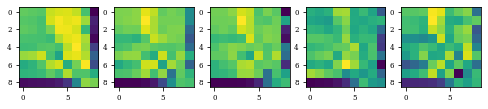

In [50]:
val_ensemble_map = np.array(ensemble_perf_multi[0])
unique_conc = np.unique(_tt_conc)
avg_ensemble_map = []
for s_conc in unique_conc:
    ind = np.where(_tt_conc == s_conc)[0]
    avg_ensemble_map.append(np.mean((val_ensemble_map[ind]), axis=0))
fig = plt.figure(figsize=(10, 3))
for i, s_conc in enumerate(unique_conc):
    ax = fig.add_subplot(1, 6, i+1)
    ax.imshow(avg_ensemble_map[i][0])

In [282]:
val_pred = val_collect[3]
val_conc = tpf_obj.concentration[0]
print(np.shape(val_conc), np.shape(val_pred))

l = [utils.calc_rsquare_log(v, q) for v, q in zip(val_conc, val_pred)]
np.mean(l)

(30, 12) (30, 12)


0.9529260350024547

In [414]:
np.random.choice(np.arange(5), 5, replace=False)

array([2, 1, 4, 0, 3])

In [572]:
# version_int = [int(v.split("version_")[1]) for v in tpf_obj.version_use]
version_int = np.array(version_int)[np.random.choice(np.arange(len(version_int)), len(version_int), replace=False)]
imp.reload(utils)
imp.reload(tpf)
perf_tot = []
version_use = []
num=4
for i in range(len(version_int)):
    select_sequence = [list(np.arange(i+num)[i:]) + [j] for j in range(len(version_int))[num+i:]]
    for s_seq in select_sequence:
        tpf_obj = tpf.GetTomasPerformanceVIT(True, False, lr=0.0006, 
                                             patch_size=2, version_use=np.array(version_int)[s_seq], 
                 normalization="none", concentration_float=1e-6, quantification_loss="none",
                 target_shape=[40, 40], leave_method="leave_one_chip", dataset="PA", 
                                    model_init="xavier", lr_schedule="cosine")
#         pred, conc, conc_update, perf_group = tpf_obj.get_quantification_performance(show=False, 
#                                                                                      tds_dir=tds_dir, 
#                                                                                     save=False)
#         perf_tot.append(perf_group)
        version_use.append(np.array(version_int)[s_seq])
        _out=tpf_obj.get_detection_performance(show=False, save=False, tds_dir=tds_dir)
        perf_tot.append(_out[4])

['stat_patch_2_lr_0.0006_cosine_initialisation_xavier_normalization_none_none_target_h_40_leave_one_chip.obj', 'stat_patch_2_lr_0.0006_normalization_none_none_target_h_40_leave_one_chip.obj']
['stat_patch_2_lr_0.0006_cosine_initialisation_xavier_normalization_none_none_target_h_40_leave_one_chip.obj', 'stat_patch_2_lr_0.0006_normalization_none_none_target_h_40_leave_one_chip.obj']
['stat_patch_2_lr_0.0006_cosine_initialisation_xavier_normalization_none_none_target_h_40_leave_one_chip.obj', 'stat_patch_2_lr_0.0006_normalization_none_none_target_h_40_leave_one_chip.obj']
['stat_patch_2_lr_0.0006_cosine_initialisation_xavier_normalization_none_none_target_h_40_leave_one_chip.obj', 'stat_patch_2_lr_0.0006_normalization_none_none_target_h_40_leave_one_chip.obj']
['stat_patch_2_lr_0.0006_cosine_initialisation_xavier_normalization_none_none_target_h_40_leave_one_chip.obj', 'stat_patch_2_lr_0.0006_normalization_none_none_target_h_40_leave_one_chip.obj']
['stat_patch_2_lr_0.0006_cosine_initiali

array([[-0.02142942, -0.28804407],
       [ 0.10003457, -0.3849322 ],
       [ 0.07235098, -0.39220822],
       [ 0.10749999, -0.4817019 ],
       [-0.68126523,  0.24131969],
       [-0.66348445,  0.29961306],
       [-0.10089214, -0.0448146 ],
       [-0.40115732,  0.00135116],
       [-0.51707995,  0.14624992],
       [-0.40556365,  0.04133554],
       [-0.08866219, -0.04394121],
       [-0.71900403,  0.3147412 ],
       [-0.39976686,  0.04583119],
       [-0.39227363,  0.04169044],
       [-0.11514423, -0.00821071],
       [-0.30323362, -0.04701848],
       [-0.7553657 ,  0.3397572 ],
       [-0.08141972, -0.04545603],
       [-0.35781118,  0.00349064],
       [-0.67028666,  0.27271518],
       [-0.87238723,  0.5428188 ],
       [-0.5192017 ,  0.16018084],
       [-0.26408637, -0.07968408],
       [-0.7474216 ,  0.37782165],
       [-0.28575078, -0.12296744]], dtype=float32)

In [573]:
perf_array = np.array(perf_tot)
log_max = np.argmax(perf_array[:, 0])
version_use[log_max], np.max(perf_array[:, 1]), perf_array[log_max]

(array([20202, 24017, 19640,  4209, 20887]),
 0.975609756097561,
 array([0.96      , 0.97560976]))

In [579]:
import produce_figures_main as pfm
imp.reload(pfm)


<module 'produce_figures_main' from '/home/blia/clean_vit/produce_figures_main.py'>

validation heatmap (3, 1, 9, 9) (3, 1, 9, 9)
the heatmap shape (3, 1, 9, 9)
-2.8194765714206116 4.480486253261598
the heatmap shape (3, 1, 9, 9)
53.333333333333336 93.33333333333333


([array([[15.04943581,  0.        ],
         [26.12256279,  0.        ],
         [ 0.        ,  8.47262774],
         [14.49334106,  0.        ],
         [ 9.55195198,  0.        ],
         [ 0.41680572,  0.73662113],
         [ 0.        ,  4.75078168],
         [10.74446125,  0.        ],
         [ 0.        ,  3.62592316],
         [ 0.        ,  7.19694948],
         [ 0.        ,  6.06698132],
         [ 0.        , 10.3614399 ],
         [ 6.20358276,  0.        ],
         [ 7.60225124,  0.        ],
         [ 0.        ,  4.72547703],
         [ 7.62383471,  0.        ],
         [ 0.        ,  6.87974024],
         [ 9.34197187,  0.        ],
         [10.28260994,  0.        ],
         [ 0.        ,  7.96487236],
         [ 7.7399174 ,  0.        ],
         [ 0.        , 11.81435814],
         [ 0.        ,  8.83687468],
         [ 0.        , 12.90500679],
         [ 0.        , 10.06052694],
         [ 0.        , 14.1416626 ],
         [ 0.        , 14.04333   ],
 

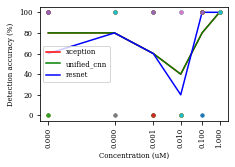

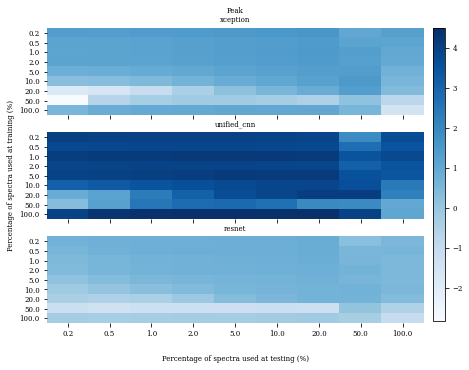

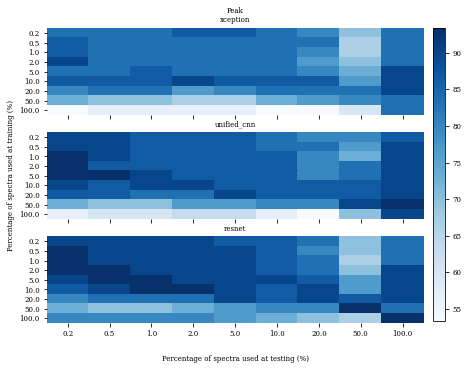

In [581]:
_out = pfm.get_spectra_performance_detection_heatmap(["xception", "unified_cnn", "resnet"], "validation_loss", dataset="TOMAS")

[0.99999937 0.99993077 0.999705   0.99988973 0.99868041 0.99956891
 0.99972367 0.99972258 0.99952153 0.99967963 0.99960559 0.99982902
 0.99961719 0.99973723 0.99979268 0.99983355 0.99961905 0.99982145
 0.99954857 0.99955696 0.97900333 0.99971194 0.99979576 0.99987748
 0.99949224 0.99996524 0.99995897 0.9999639  0.99992777 0.99994697]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[0.58320476 0.98014226 0.99101548 0.98195318 0.97316484 0.99435594
 0.99511931 0.98888379 0.98301993 0.98709961 0.98034168 0.99402686
 0.99297592 0.98972854 0.98777079 0.99061812 0.99218118 0.99465189
 0.93021673 0.98918641 0.79588886 0.98430947 0.99223741 0.98597569
 0.97082989 0.99270878 0.99147266 0.99678445 0.99322714 0.99445098]
[0.94845396 0.99865186 0.9981012  0.8132801  0.6939808  0.99076957
 0.99147093 0.9894492  0.97901976 0.9947066  0.98147947 0.9865414
 0.99568915 0.9816075  0.99482185 0.9941561  0.9982785  0.8997469
 0.8591594  0.9916406  0.99965966 0.

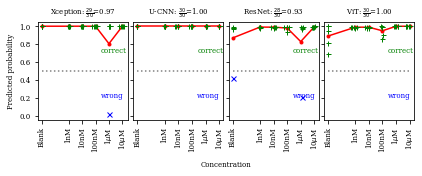

In [365]:
imp.reload(tpf)
# tpf.compare_concentration_prediction_curve(["xception","unified_cnn", "resnet"], "log_rsquare", "PA", save=True)
tpf.compare_detection_prediction_curve(model_spectra=["xception", "unified_cnn", "resnet"], 
                                       perf_crit="validation_loss",
                                       dataset="DNP", 
                                      tds_dir="../rs_dataset/paper_figure/", 
                                       save=False)

In [838]:
imp.reload(read_tomas)
imp.reload(read_pa)
imp.reload(read_dnp)
sers_map, label, conc, wavenumber, mapsize = read_dnp.prepare_dnp_data([40, 40], testing=True, quantification=True)

**************I will only leave one measurement out************
Training chip index: (array([1, 2, 3, 4, 5]), array([5, 5, 5, 5, 4]))
Testing chip index: (array([5]), array([1]))


In [839]:
np.unique(conc)

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])

(0.9825694722238834, 0.8817213171094918, 0, 32.253383963290425)


/home/blia/clean_vit/utils.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  r_square = 1.0 - top / bottom


The shape of the prediction group (3, 0)
(0.5954140372670723, 0.5632405675984911, 0, 42.08908512225925)


/home/blia/clean_vit/utils.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  r_square = 1.0 - top / bottom


The shape of the prediction group (3, 0)
(0.9997151015333786, 0.9074817371957029, 0, 19.551379246831704)


/home/blia/clean_vit/utils.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  r_square = 1.0 - top / bottom


The shape of the prediction group (3, 0)


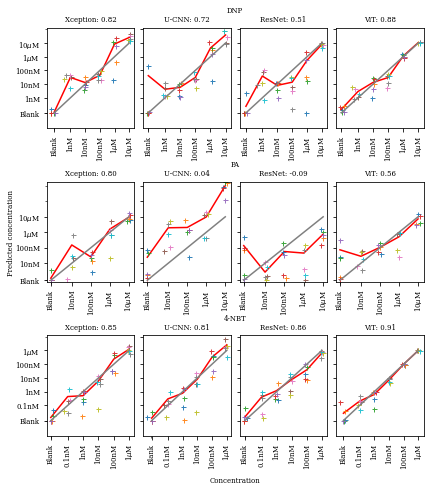

In [388]:
imp.reload(tpf)
# tpf.combined_detection_prediction_curve(tds_dir="../rs_dataset/paper_figure/",
#                                         save=False)
# tpf.compare_detection_prediction_curve(["xception", "unified_cnn", "resnet"], "validation_loss", "PA")
tpf.combined_concentration_prediction_curve(tds_dir="../rs_dataset/paper_figure/",
                                            save=False)

In [318]:
path = "../exp_data/VIT/TOMAS/"

In [319]:
len(all_path_old), len(all_path_new)

(9, 45)

In [ ]:
# # version_use = [30541,   989, 31058, 18197, 30988]
# version_use = [13579, 9860, 19800, 12266, 29055]
# version_use = [6338,  5353, 12885,  1746,  8543]


In [577]:
import utils as utils 
imp.reload(utils)
imp.reload(tpf)
# version_g = [12266, 13579, 19800, 3711, 9860]
# dnp quantification: 9860, 19800, 12266, 256, 29055 
# 19570, 6714, 13117, 25645, 10573
#dnp quantification: 'version_13579', 'version_9860', 'version_19800', 'version_3711', 'version_12266',
#dnp quantification: 'version_6539', 'version_256', 'version_3697', 'version_24887', 'version_15017', 'version_29055'
#['version_19570', 'version_25645', 'version_29261', 
#'version_5269', 'version_6714', 'version_13117', 'version_1506', 'version_26451']

# tpf_obj = tpf.GetTomasPerformanceVIT(False, True, lr=0.08, patch_size=2, version_use=[], 
#                  normalization="none", concentration_float=1e-6, quantification_loss="mse",
#                  target_shape=[56, 56], leave_method="leave_one_chip", dataset="TOMAS",
#                                     model_init="xavier", lr_schedule="cosine", loc="scratch")


# tpf_obj = tpf.GetTomasPerformanceVIT(True, False, lr=0.008, patch_size=2, version_use=[30582, 1066, 30186, 4731, 2814], 
#                  normalization="none", concentration_float=1e-6, quantification_loss="none",
#                  target_shape=[56, 56], leave_method="leave_one_chip", dataset="TOMAS",
#                                     model_init="xavier", lr_schedule="cosine")

# 9860, 19800, 12266, 29055, 13579, 13579, 9860, 19800, 12266, 29055
# tpf_obj = tpf.GetTomasPerformanceVIT(False, True, lr=0.006, patch_size=2, 
#                                      version_use=[13579, 9860, 19800, 12266, 29055], 
#                  normalization="none", concentration_float=1e-6, quantification_loss="mse",
#                  target_shape=[44, 44], leave_method="leave_one_chip", dataset="DNP", 
#                                     model_init="xavier", lr_schedule="cosine", 
#                                     )

# 19570, 25646, 6714, 13117, 10573 # normalization is max DNP dataset 
# 32619, 9093,31050,10637, 31797 # normalization is none DNP dataset 
# tpf_obj = tpf.GetTomasPerformanceVIT(True, False, lr=0.005, patch_size=2, version_use=[32619, 9093,31050,10637, 31797], 
#                  normalization="none", concentration_float=0, quantification_loss="none",
#                  target_shape=[44, 44], leave_method="leave_one_chip", dataset="DNP",
#                                     model_init="xavier", lr_schedule="cosine")
# 25147, 13307, 15835 , 31058, 20402, 3872, 20402,  4964,  1064, 20042

# VERSION FOR 0.0004  20402,  4964,  1064, 20042, 26410, 31058
# tpf_obj = tpf.GetTomasPerformanceVIT(False, True, lr=0.0004, patch_size=2, version_use=[20402,  4964,  1064, 20042, 26410], 
#                  normalization="none", concentration_float=1e-5, quantification_loss="mse",
#                  target_shape=[40, 40], leave_method="leave_one_chip", dataset="PA", 
#                                     model_init="xavier", lr_schedule="cosine")
# print(time.time() - time_init)

# tpf_obj = tpf.GetTomasPerformanceVIT(False, True, lr=0.0006, patch_size=2, version_use=[30541,   989, 31058, 18197, 30988], 
#                  normalization="none", concentration_float=5e-5, quantification_loss="mse",
#                  target_shape=[40, 40], leave_method="leave_one_chip", dataset="PA", 
#                                     model_init="xavier", lr_schedule="cosine", 
#                                     loc="scratch")

# tpf_obj = tpf.GetTomasPerformanceVIT(False, True, lr=0.0004, patch_size=2, version_use=[20402,  4964,  1064, 20042, 26410], 
#                  normalization="none", concentration_float=5e-5, quantification_loss="mse",
#                  target_shape=[40, 40], leave_method="leave_one_chip", dataset="PA", 
#                                     model_init="xavier", lr_schedule="cosine")

#4209, 12759, 5260, 31240, 20202
12759, 5260, 20202, 20887, 4209
# tpf_obj = tpf.GetTomasPerformanceVIT(True, False, lr=0.0006, patch_size=2, version_use=[20202, 12759, 5260,  4209, 20887], 
#                  normalization="none", concentration_float=0, quantification_loss="none",
#                  target_shape=[40, 40], leave_method="leave_one_chip", dataset="PA", 
#                                     model_init="xavier", lr_schedule="cosine")



['stat_patch_2_lr_0.0006_cosine_initialisation_xavier_normalization_none_none_target_h_40_leave_one_chip.obj', 'stat_patch_2_lr_0.0006_normalization_none_none_target_h_40_leave_one_chip.obj']


The shape of the conc (25,) [0.    0.001 0.01  0.1   1.   ] (25,)
-1.785026931424978e-05


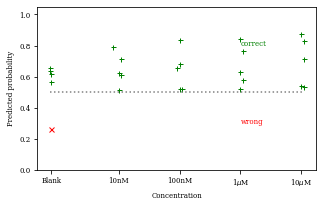

In [578]:
imp.reload(utils)
imp.reload(tpf)
tds_dir ="../exp_data/VIT/%s/detection_%s_quantification_%s/" % (tpf_obj.dataset, tpf_obj.detection, 
                                                                tpf_obj.quantification)

if tpf_obj.quantification:
    pred, conc, conc_update, perf_group = tpf_obj.get_quantification_performance(show=True, tds_dir=tds_dir, 
                                                                                save=False)
    tpf_obj._get_quantification_performance_per_version(show=False)
else:
    _out=tpf_obj.get_detection_performance(show=True, save=False, tds_dir=tds_dir)

In [566]:
_out[4]

[0.96, 0.975609756097561]

In [859]:
value = np.array(tpf_obj.quan_perf)
value[:, 1] = value[:, 1].astype(np.float32)
index = np.argsort(value[:, 1])[-8:]
v = [int(v.split("version_")[1]) for v in value[index, 0]]
print(v)

[1064, 5630, 23255, 4284, 12984, 31058, 15800, 18197]


In [821]:
attn_name = "../exp_data/VIT/DNP/detection_True_quantification_False/DNP_15_norm_max.obj"
# attn_name = "../exp_data/VIT/DNP/detection_True_quantification_False/DNP_15_norm_none.obj"
# attn_name = "../exp_data/VIT/PA/detection_True_quantification_False/PA_4_norm_none.obj"

In [824]:
imp.reload(pfm)
re_obj = pfm.RelocateSelectionSersMap("DNP", quantile=0.995, attn_name=attn_name)
index_conc = [15, 16, 17,18, 19]

[15, 16, 17, 18, 19]


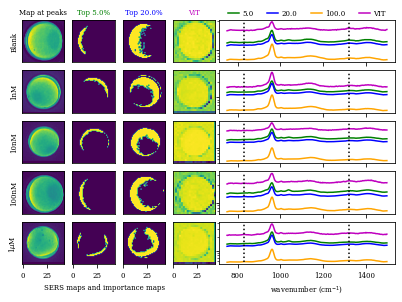

In [825]:
re_obj.show_maps_single_concentration(index_conc=index_conc, tds_dir="../rs_dataset/paper_figure/", 
                                     save=True)

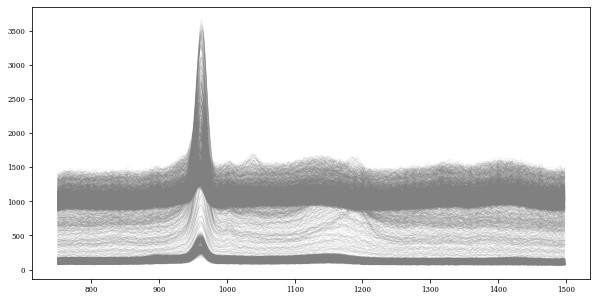

In [795]:
s_map = re_obj.sers_maps[15]
s_map = np.reshape(s_map, [44 * 44, 389])
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
for s in s_map:
    ax.plot(re_obj.wavenumber, s, color='gray', lw=0.4, alpha=0.2)

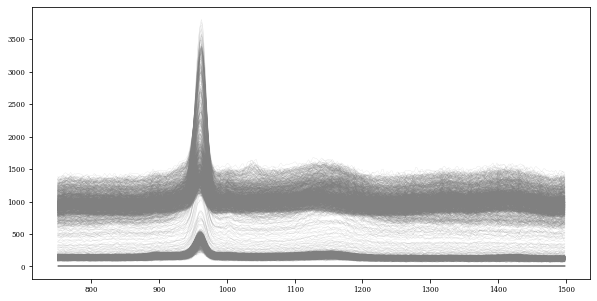

In [794]:
s_map = re_obj.sers_maps[16]
s_map = np.reshape(s_map, [44 * 44, 389])
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
for s in s_map:
    ax.plot(re_obj.wavenumber, s, color='gray', lw=0.4, alpha=0.2)


In [146]:
# import ml_method as ml_model 
import data.read_tomas as read_tomas
imp.reload(read_tomas)
imp.reload(psd)
imp.reload(ml_model)
ml_obj = ml_model.MLMethod("DNP", True, False)
pred_val, pred_tt, perf_val, tt_act_pred, tt_perf = ml_obj.model(["random_forest"], save=False)

**************I will only leave one measurement out************
Training chip index: (array([1, 2, 3, 4, 5]), array([5, 6, 6, 6, 6]))
Testing chip index: (array([1]), array([1]))
There are 23 training data and 6 validation data
The replicated validation index in the training []
----------------------Before augmenting the data----------------------
SERS map shape (23, 44, 44, 389)
Unique label and count (array([0., 1.]), array([ 3, 20]))
Unique concentration and count (array([0.e+00, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]), array([3, 4, 4, 4, 4, 4]))
                                                                       
----------------------Before augmenting the data----------------------
SERS map shape (6, 44, 44, 389)
Unique label and count (array([0., 1.]), array([1, 5]))
Unique concentration and count (array([0.e+00, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]), array([1, 1, 1, 1, 1, 1]))
                                                                       
========================

## User-define
- define the dataset 
- define detection and quantification (if detection is True, then quantification has to be False)
- define the directory that saves the dataset

In [841]:
dataset = "DNP"
detection = False
quantification = True
imp.reload(common)

const = common.get_config_test_vit(dataset, detection, quantification, leave_index=22)
path_mom="../rs_dataset/"  # USER DEFINE
concentration_float=1e-6 #1e-5 #5e-5 #5e-5 
const["target_shape"] = [40, 40]

In [842]:
const["leave_index"] = 15
const["leave_method"] = "leave_one_chip"
const["normalization"] = "none"
print(const)
# const["leave_method"] = "leave_one_chip_per_conc"

{'patch_size': 16, 'input_feature': 192, 'mlp_dim': 512, 'num_heads': 3, 'num_layers': 2, 'pool': 'cls', 'representation_size': 0, 'leave_method': 'leave_one_chip', 'leave_index': 15, 'lr': 0.08, 'target_shape': [40, 40], 'normalization': 'none', 'patch': 2, 'quantification_loss': 'mae', 'model_vit': 'eetti16'}


## Load the dataset

In [843]:
print(dataset)
imp.reload(psd)
data_obj = psd.ReadSERSData(dataset, target_shape=const["target_shape"], 
                            bg_method="ar",
                            tr_limited_conc=[0], 
                            percentage=0, top_selection_method="sers_maps", 
                            path_mom=path_mom, use_map=False, quantification=quantification,
                            detection=detection,
                            cast_quantification_to_classification=False,
                            normalization=const["normalization"], leave_index=const["leave_index"], 
                            skip_value=1, leave_method=const["leave_method"])

DNP


In [844]:
[tr_maps, tr_label, tr_conc, tr_peak, tr_wave], [val_maps, val_label, val_conc, val_peak], \
    [tt_maps, tt_label, tt_conc, tt_peak, tt_wave], imshape, num_class = data_obj.forward_test()

**************I will only leave one measurement out************
Training chip index: (array([1, 2, 3, 4, 5]), array([4, 5, 5, 5, 5]))
Testing chip index: (array([1]), array([1]))
There are 19 training data and 5 validation data
The replicated validation index in the training []
----------------------Before augmenting the data----------------------
SERS map shape (19, 40, 40, 389)
Unique label and count (array([1.]), array([19]))
Unique concentration and count (array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]), array([4, 4, 4, 3, 4]))
                                                                       
----------------------Before augmenting the data----------------------
SERS map shape (5, 40, 40, 389)
Unique label and count (array([1.]), array([5]))
Unique concentration and count (array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]), array([1, 1, 1, 1, 1]))
                                                                       
=============================================Training========

(30,)

In [39]:
tr_conc_update = tr_conc.copy()
tr_conc_update[tr_conc_update == 0.0] = concentration_float
tr_conc_update = np.log(tr_conc_update)
perc = 0.05
tr_spectra, _, _, _ = data_obj.select_top_spectra(tr_maps, tr_label, tr_conc, tr_peak, 
                                                  perc, "top_peak", False, True, wavenumber=tr_wave)
tt_spectra, _, _, _ = data_obj.select_top_spectra(tt_maps, tt_label, tt_conc, tt_peak, 
                                                  perc, "top_peak", False, True, wavenumber=tr_wave)

print(np.shape(tr_spectra), np.shape(tr_conc_update))

---------------------------------------------------------------
                 Use top 80.00 spectra with top_peak
---------------------------------------------------------------
For the pricid acid, if the selection criterior is peak intensity, get intensity from map regions
The min and max of the wavenumber 750.2733722706325 1398.2382160206325
selected wavenumber 802.3419757862575 840.9113117237575
selected wavenumber 1313.3856769581325 1351.9550128956325
Using spectra as the input, the number of channel equals to one
---------------------------------------------------------------
                 Use top 80.00 spectra with top_peak
---------------------------------------------------------------
For the pricid acid, if the selection criterior is peak intensity, get intensity from map regions
The min and max of the wavenumber 750.2733722706325 1398.2382160206325
selected wavenumber 802.3419757862575 840.9113117237575
selected wavenumber 1313.3856769581325 1351.9550128956325
Using sp

In [797]:
# import data.utils as data_utils 
# i = [i * 4 for i in range(5)]
# print(tr_conc[i])
# tr_maps_update, tr_label_update, tr_conc_update, tr_peak_update, _ = data_utils.aug_signal(tr_maps[i], 
#                                                                                            tr_label[i], 
#                                                                                            tr_conc[i], 
#                                                                                            tr_wave, 
#                                                                repeat=1, k=6, norm_std=1, norm_mean=0,
#                                                                detection=False, quantification=True, 
#                                                                val=False)
# print("the shape of data", np.shape(tr_maps_update), np.shape(tr_maps[i]))



In [798]:

# pred = conc 
# index_to_show = np.where(tr_conc == 0.01)[0]
# fig = plt.figure(figsize=(10, 15))
# ax = fig.add_subplot(len(index_to_show)+1, 1, 1)
# show_maps_with_regions(tt_maps, tt_wave, 20, 
#                        "Concentration: 100nM (Predicted concentration: %.1f)" % (pred[conc == 0.01][0] * 10000), ax)

# for i, s_index in enumerate(index_to_show):
#     ax = fig.add_subplot(len(index_to_show)+1, 1, i+2)
#     show_maps_with_regions(tr_maps[s_index:s_index+1], tt_wave, 20, 
#                            "concentration: 100nM (Predicted concentration: %.1f)" % (pred[conc==0.01][i+1] * 10000),
#                            ax)
# plt.savefig("../exp_data/VIT/DNP/detection_False_quantification_True/sers_map_at_concentration_0.01.pdf", 
#            pad_inches=0, bbox_inches='tight')
# index_to_show = np.where(tr_conc == 1)[0]
# fig = plt.figure(figsize=(10, 15))
# for i, s_index in enumerate(index_to_show):
#     ax = fig.add_subplot(len(index_to_show), 1, i+1)
#     show_maps_with_regions(tr_maps[s_index:s_index+1], 
#                            tt_wave, 20, "concentration: %duM" % tr_conc[s_index], 
#                            ax, dataset="PA")
# plt.savefig("../exp_data/VIT/DNP/detection_False_quantification_True/sers_map_at_concentration_0.0001.pdf", 
#            pad_inches=0, bbox_inches='tight')


In [799]:
# s_index = np.where(tr_conc[i] == 1)[0][0]
# fig = plt.figure(figsize=(10, 5))
# ax = fig.add_subplot(111)
# show_maps_with_regions(tr_maps[i][s_index:s_index+1], 
#                        tt_wave, 20, "concentration: %duM" % tr_conc[i][s_index], 
#                        ax, dataset="PA")
# s_index = np.where(tr_conc_update == 1)[0][1]
# fig = plt.figure(figsize=(10, 5))
# ax = fig.add_subplot(111)
# show_maps_with_regions(tr_maps_update[s_index:s_index+1], 
#                        tt_wave, 20, "concentration: %duM" % tr_conc_update[s_index], 
#                        ax, dataset="PA")


In [1078]:
const["model_vit"] = "xception"

In [301]:
tt_conc_update = tt_conc.copy()
tt_conc_update[tt_conc_update == 0.0] = concentration_float


## Load the models 
We repeat each experiment five times to calculate the ensemble prediction

In [958]:
imp.reload(te)
const["lr"] = 0.00
ckpt_group = te.get_ckpt(dataset, detection, quantification, const)

There are 0 models for ensemble calculation


In [317]:
print("leave index", const["leave_index"], tt_conc)
lr=0.005
m_init="xavier"
lr_init = "cosine"
if quantification:
    
    path = "/nobackup/blia/exp_data/VIT/PA/detection_False_quantification_True/version_25147_ViTeetti16_patch_height_2_patch_width_2_quantification_True_normalization_none_concentration_float_0.0000_cast_quantification_to_cls_False_learning_rate_%.4f_target_shape_40_skip_value_1_xavier_learning_decay_cosine_quantification_loss_mse/" % lr
#     path = "/nobackup/blia/exp_data/VIT/PA/detection_False_quantification_True/version_25147_ViTeetti16_patch_height_2_patch_width_2_quantification_True_normalization_none_concentration_float_0.0001_cast_quantification_to_cls_False_learning_rate_0.0008_target_shape_44_skip_value_1_xavier_quantification_loss_mse/"
#     path = "/nobackup/blia/exp_data/VIT/PA/detection_False_quantification_True/version_25147_ViTeetti16_patch_height_2_patch_width_2_quantification_True_normalization_none_concentration_float_%.4f_cast_quantification_to_cls_False_learning_rate_%.4f_target_shape_44_skip_value_1_quantification_loss_mse/" % (concentration_float, lr)
    #path="/nobackup/blia/exp_data/VIT/DNP/detection_False_quantification_True/version_9860_ViTeetti16_patch_height_2_patch_width_2_quantification_True_normalization_none_concentration_float_0.0000_cast_quantification_to_cls_False_learning_rate_0.0060_target_shape_40_skip_value_1_xavier_quantification_loss_mse/"
if detection:
#    path = "/nobackup/blia/exp_data/VIT/DNP/detection_True_quantification_False/version_25353_ViTeetti16_patch_height_2_patch_width_2_quantification_False_normalization_max_learning_rate_0.0050_target_shape_44_skip_value_1_xavier_quantification_loss_none/"
    path="/nobackup/blia/exp_data/VIT/DNP/detection_True_quantification_False/version_54_ViTeetti16_patch_height_2_patch_width_2_quantification_False_normalization_max_learning_rate_0.0050_target_shape_40_skip_value_1_xavier_quantification_loss_none/"
#     path = "/nobackup/blia/exp_data/VIT/PA/detection_True_quantification_False/version_20887_ViTeetti16_patch_height_2_patch_width_2_quantification_False_normalization_none_learning_rate_%.4f_target_shape_40_skip_value_1_%s_learning_decay_%s_quantification_loss_none/" % (lr, m_init, lr_init)
#     path = "/nobackup/blia/exp_data/VIT/PA/detection_True_quantification_False/version_18159_ViTeetti16_patch_height_2_patch_width_2_quantification_False_normalization_max_learning_rate_%.4f_target_shape_44_skip_value_1_quantification_loss_none/" % lr
sub_path = path + "%s_repeat_%d/" % (const["leave_method"], const["leave_index"])
# sub_path = path + "leave_one_chip_repeat_4/"
sub_ckpt=[v for v in os.listdir(sub_path) if ".ckpt" in v and "model-" in v and "-v1." not in v]

leave index 15 [0.01]


In [318]:
# lr=0.04
# path = "/nobackup/blia/exp_data/Spectra_xception/DNP/detection_False_quantification_True_average_spectra_True/version_0_selection_method_top_peak_select_percentage_0.010_learning_rate_%.4f_concentration_float_0.0000_cast_quantification_to_cls_False_quantification_loss_mse/leave_one_chip_repeat_%d/" % (lr, const["leave_index"])
# sub_ckpt = [v for v in os.listdir(path) if ".ckpt" in v and "model-" in v and "-v1." not in v]

In [319]:
ckpt_group = [sub_path + v for v in sub_ckpt]
print(sub_ckpt)

['model-epoch=164-validation_accuracy=1.0000.ckpt', 'model-epoch=164-validation_f1_score=1.0000.ckpt', 'model-epoch=239-validation_loss=0.1409.ckpt', 'model-epoch=259-validation_loss=0.1372.ckpt', 'model-epoch=109-validation_f1_score=1.0000.ckpt', 'model-epoch=109-validation_accuracy=1.0000.ckpt', 'model-epoch=279-validation_loss=0.1389.ckpt', 'model-epoch=300.ckpt', 'model-epoch=154-validation_f1_score=1.0000.ckpt', 'model-epoch=274-validation_loss=0.1325.ckpt', 'model-epoch=154-validation_accuracy=1.0000.ckpt', 'model-epoch=139-validation_accuracy=1.0000.ckpt', 'model-epoch=139-validation_f1_score=1.0000.ckpt', 'model-epoch=179-validation_f1_score=1.0000.ckpt', 'model-epoch=249-validation_loss=0.1430.ckpt', 'model-epoch=179-validation_accuracy=1.0000.ckpt']


In [320]:
if const["model_vit"] == "eetti16":
    model_use = train_vit.ViTLightning(num_class, tuple([const["patch"], const["patch"]]), 
                                   const["input_feature"], const["num_layers"], const["num_heads"], 
                                   const["mlp_dim"], 0, 2, 10, 10, num_gpu, 0.03, add_positional_encoding=True, 
                                   quantification=quantification, detection=detection, imshape=imshape,
                                       concentration_float=concentration_float,
                                      cast_quantification_to_classification=False)
else:
    print("getting %s model" % const["model_vit"])
    model_use = train_spectra.XceptionLightning(num_class, batch_size=512, num_samples=45000, warmup_epochs=10, 
                                                num_gpus=1, enc_lr=0.03, quantification=quantification, 
                                                detection=detection,
                                                wavenumber=110, strategy="test", epochs=50, 
                                                reduce_channel_first=True,
                                                model_type=const["model_vit"], data_input_channel=1, 
                                                concentration_float=concentration_float,
                                                cast_quantification_to_classification=False)
    

40 40 2 2
Patch height 2 Patch width 2 Image shape 40 40


In [307]:
# model_use.hparams.concentration_float

In [1193]:
# num_para= 0.0
# for name, q in model_use.named_parameters():
#     if q.requires_grad:
#         num_para += np.prod(q.shape)
# print("Number of parameters: %.4f M" % (num_para / 1e+6))

In [1194]:
# index_use = [i * 11 for i in range(6)]
# tt_maps, tt_label, tt_conc, tt_peak = val_maps[index_use], val_label[index_use], val_conc[index_use], val_peak[index_use]


In [1195]:
# ckpt_use = []
# for v in ckpt_group:
#     if "validation" in v:
#         if float(v.split("validation")[1].split('.ckpt')[0].split("=")[1]) <16:
#             ckpt_use.append(v)
#     else:
#         ckpt_use.append(v)
# ckpt_use = [v for v in ckpt_group if float(v.split("validation")[1].split('.ckpt')[0].split("=")[1]) < 16 and "validation" in v]
# v = ckpt_group[10]
# print(v)
# float(v.split("validation")[1].split('.ckpt')[0].split("=")[1])
# print(len(ckpt_use))

In [321]:
def get_all(tr_map, tt_map, option="conc"):
    if option == "conc":
        return np.concatenate([tr_map, tt_map], axis=0)
    elif option == "tr":
        return tr_map 
    elif option == "tt":
        return tt_map 
option = "tt"
map_g = get_all(tr_maps, tt_maps, option)
conc_g = get_all(tr_conc, tt_conc, option)
label_g = get_all(tr_label, tt_label, option)
peak_g = get_all(tr_peak, tt_peak, option)

In [322]:
tt_percentage = 0.01 #0.75 #002 #002
tt_method = "top_peak" # "top_peak"
if "eetti16" not in const["model_vit"]:
    tt_maps_update, _, _, _ = data_obj.select_top_spectra(tt_maps, tt_label, tt_conc, tt_peak, 
                                                          tt_percentage, tt_method, use_map=False, avg=True,
                                                          wavenumber=tr_wave)
else:
    tt_maps_update = map_g

## Run detection/quantification and give the ensemble predictions

In [323]:
imp.reload(te)
prediction_group = []
wavecut = np.arange(np.shape(tt_maps)[-1])
for s_ckpt in ckpt_group:
    model_update = model_use.load_from_checkpoint(s_ckpt)
    model_update.eval()
    model_update.requires_grad_(False)
    model_update.to(torch.device("cuda"))
    test_obj = te.Test(tt_maps_update, label_g, conc_g, peak_g, model_update,
                       [const["patch"], const["patch"]], imshape[:-1],
                       model_type=const["model_vit"], 
                       cast_quantification_to_classification=False, 
                       tds_dir=None, save=False)
    if const["model_vit"] == "eetti16":
        pred, quan, rsquare = test_obj.get_vit_accuracy()
    else:
        pred, quan, rsquare = test_obj.get_spectra_accuracy()
    if detection:
        prediction_group.append(pred)
    else:
        prediction_group.append(quan)

40 40 2 2
Patch height 2 Patch width 2 Image shape 40 40
The concentration float  0.0
Accuracy: 0.0000
40 40 2 2
Patch height 2 Patch width 2 Image shape 40 40
The concentration float  0.0
Accuracy: 0.0000
40 40 2 2
Patch height 2 Patch width 2 Image shape 40 40
The concentration float  0.0
Accuracy: 0.0000
40 40 2 2
Patch height 2 Patch width 2 Image shape 40 40
The concentration float  0.0
Accuracy: 0.0000
40 40 2 2
Patch height 2 Patch width 2 Image shape 40 40
The concentration float  0.0
Accuracy: 0.0000
40 40 2 2
Patch height 2 Patch width 2 Image shape 40 40
The concentration float  0.0
Accuracy: 0.0000
40 40 2 2
Patch height 2 Patch width 2 Image shape 40 40
The concentration float  0.0
Accuracy: 0.0000
40 40 2 2
Patch height 2 Patch width 2 Image shape 40 40
The concentration float  0.0
Accuracy: 0.0000
40 40 2 2
Patch height 2 Patch width 2 Image shape 40 40
The concentration float  0.0
Accuracy: 0.0000
40 40 2 2
Patch height 2 Patch width 2 Image shape 40 40
The concentratio

In [324]:
imp.reload(utils)
if quantification:
    for v, q in zip(ckpt_group, prediction_group):
        print(v.split("/")[-1], q, utils.calc_rsquare_log(tt_conc, q))
    print(tt_conc, np.mean(prediction_group, axis=0))
if detection:
    print(tr_label, tt_label)
    for v, q in zip(ckpt_group, prediction_group):
        print(v.split("/")[-1], np.argmax(q, axis=-1)[:, 0])
    print(tt_label, np.argmax(np.mean(prediction_group, axis=0), axis=-1)[:, 0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [1.]
model-epoch=164-validation_accuracy=1.0000.ckpt [0]
model-epoch=164-validation_f1_score=1.0000.ckpt [0]
model-epoch=239-validation_loss=0.1409.ckpt [0]
model-epoch=259-validation_loss=0.1372.ckpt [0]
model-epoch=109-validation_f1_score=1.0000.ckpt [0]
model-epoch=109-validation_accuracy=1.0000.ckpt [0]
mo

array([[[0.4828285 , 0.51717156]]], dtype=float32)

In [630]:
a = [0.00576551, 0.00093788, 0.00090957, 0.00251707]
np.mean(a), np.std(a)

(0.0025325075, 0.0019766958841761044)

In [318]:
a = [0.00060039, 0.00024964, 0.00028053, 0.00017481, 0.00793577]
np.mean(a), np.std(a), np.unique(tr_conc)

(0.001848228, 0.003047253047965659, array([0.   , 0.001, 0.01 , 0.1  , 1.   ]))

In [121]:
utils.softmax(prediction_group[4], axis=-1)

array([1.], dtype=float32)

In [122]:
import data.read_pa as read_pa 
imp.reload(read_pa)
_tr_out, _tt_out, wavenumber = read_pa.prepare_pa_data([44, 44], leave_index=0)

**************I will only leave one measurement out************
Training chip index: (array([1, 2, 3, 4, 5]), array([4, 5, 5, 5, 5]))
Testing chip index: (array([1]), array([1]))


In [137]:
np.unique(_tt_out[2])

array([0.])

In [339]:
avg_pred = np.mean(prediction_group, axis=0)
if dataset == "TOMAS" or dataset == "DNP":
    if detection:
        print("True class:", tt_label, " Predicted class:", np.argmax(avg_pred, axis=-1))
    else:
        if len(tt_conc) == 1:
            print("True concentration: %.4f (1e-6)" % tt_conc, " Predicted concentration", quan[0])
        else:
            for v, q in zip(tt_conc, avg_pred):
                print("GT concentration: %.5f vs predicted concentration: %.5f" % (v, q))
        print("rsquare:", utils.calc_rsquare(tt_conc, avg_pred))
        print("rsquare(log-transform):", utils.calc_rsquare(tt_conc_update, np.log2(avg_pred)))
else:
    if detection:
        print("Global accuracy", utils.calc_global_accuracy(avg_pred, tt_label))
    else:
        print("Rsquare of log transformed concentration", utils.get_quantification_performance(tt_conc, 
                                                                                               quan, 
                                                                                               print_info=True))

True concentration: 0.0000 (1e-6)  Predicted concentration 3.5626676e-06
rsquare: -inf
rsquare(log-transform): -inf


/home/blia/clean_vit/utils.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  r_square = 1.0 - top / bottom


IndexError: index 2 is out of bounds for axis 0 with size 1

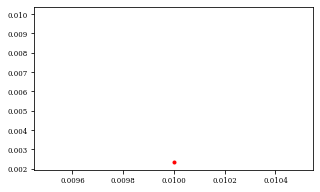

In [330]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
ax.plot(tt_conc, avg_pred, 'r.')
ax.plot(tt_conc, tt_conc, ls=':')
ax.set_yscale("symlog", linthresh=np.sort(tt_conc)[2])
ax.set_xscale("symlog", linthresh=np.sort(tt_conc)[2])

SERS map: concentration: 0.0000


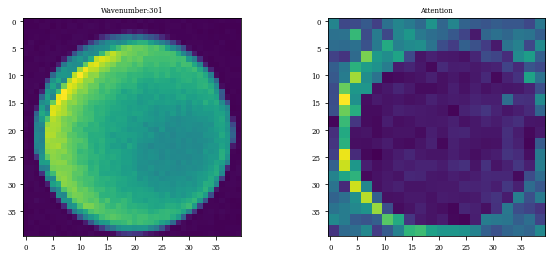

In [1202]:
imp.reload(utils)
start = np.random.choice(np.arange(len(tr_maps)), 1)[0]
start=0
print("SERS map: concentration: %.4f" % tr_conc[start])
_out = test_obj._get_single_attention_map(tt_maps[start:start+1])
s_attn_map, s_attn_imsize = test_obj._reorganize_attention_map_to_image(_out[1], _out[0], tr_peak[start],
                                                                        show=True, save=False)

In [870]:
# plotly_dir = "../rs_dataset/"
# save_plotly_data(tr_maps, tr_conc, [], tr_peak, tr_wave, plotly_dir, dataset)

In [312]:
map_use = "../exp_data/VIT/PA/detection_False_quantification_True/PA.obj"
file_use = pickle.load(open(map_use, "rb"))
print(file_use.keys())

dict_keys(['sers_maps', 'wavenumber', 'imshape', 'sample', 'concentration', 'peak', 'attention_map'])


In [315]:
attention_map = file_use["attention_map"]
select_index = np.where(file_use["concentration"] == np.max(file_use["concentration"]))[0]

In [330]:
subset_attention_map = np.array(attention_map)[select_index]
subset_sers_map = np.array(file_use["sers_maps"])[select_index]
subset_spectra = []
for i, s_map in enumerate(subset_attention_map):
    s_map_re = np.reshape(s_map, [-1])
    index = np.where(s_map_re >= np.quantile(s_map_re, 0.99))[0]
    subset_spectra.append(np.reshape(subset_sers_map[i], [-1, len(tt_wave)])[index])

In [1212]:
import shutil
path = "/nobackup/blia/exp_data/VIT/PA/detection_True_quantification_False/"
# for v in [v for v in os.listdir(path) if "version" in v]:
#     if "version_20887" not in v:
#         print(v)
#         shutil.rmtree(path + v)
#     else:
#         if "learning_rate_0.0008" not in v:
#             print(v)
#             shutil.rmtree(path + v)

# os.listdir(path)

['version_20887_ViTeetti16_patch_height_2_patch_width_2_quantification_False_normalization_none_learning_rate_0.0008_target_shape_40_skip_value_1_xavier_learning_decay_cosine_quantification_loss_none']

(5, 20, 337)


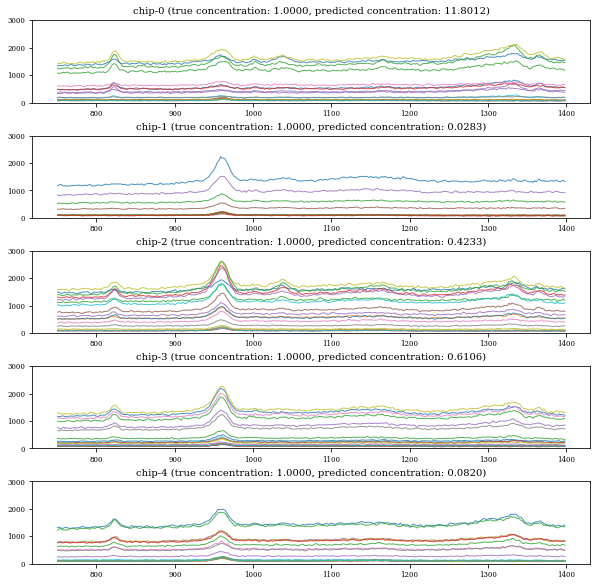

In [341]:
color_g=['r', 'g', 'b', 'orange', 'c']
fig = plt.figure(figsize=(10, 10))
print(np.shape(subset_spectra))
for i, s in enumerate(subset_spectra):
    ax = fig.add_subplot(len(subset_sers_map), 1, i+1)
    for q in s:
        ax.plot(tt_wave, q, lw=1, alpha=0.8)
    ax.set_title("chip-%d (true concentration: %.4f, predicted concentration: %.4f)" % (i, conc[-5:][i],
                                                                                        pred[-5:][i]), 
                fontsize=10)
    ax.set_ylim((0, 3000))
plt.subplots_adjust(hspace=0.4)
plt.savefig("../exp_data/VIT/PA/detection_False_quantification_True/debug.pdf", pad_inches=0, bbox_inches='tight')
#     ax.plot(tt_wave, np.mean(s, axis=0), label="chip-%d" % (i), color=color_g[i])
#     ax.fill_between(tt_wave, np.mean(s, axis=0) - np.std(s, axis=0), 
#                     np.mean(s, axis=0) + np.std(s, axis=0), color=color_g[i], alpha=0.5)
# ax.legend(loc='best')